In [29]:
# Installed required packages
# -------------------------------
# !pip install beautifulsoup4 pandas requestes
!pip install beautifulsoup4 pandas matplotlib seaborn

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url="https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [31]:
def scrape_books(soup):
    books=[]
    for book in soup.find_all("li",class_="col-xs-6"):
        title=book.h3.a.attrs["title"]
        price = book.find("p",class_="price_color").text[2:]
        rating = book.find("p",class_="star-rating")["class"][1]
        books.append({
            "Title":title,
            "Price": float(price),
            "Rating":rating
            })
    return books

In [32]:
book_data = scrape_books(soup)

In [33]:
# for item in book_data:
#     print(item)

In [34]:
df = pd.DataFrame(book_data)
print(df.head())

                                   Title  Price Rating
0                   A Light in the Attic   1.77  Three
1                     Tipping the Velvet   3.74    One
2                             Soumission   0.10    One
3                          Sharp Objects   7.82   Four
4  Sapiens: A Brief History of Humankind   4.23   Five


In [35]:
# Export to CSV
df.to_csv('data.csv', index=False)

# Export to Excel
df.to_excel('data.xlsx', index=False)

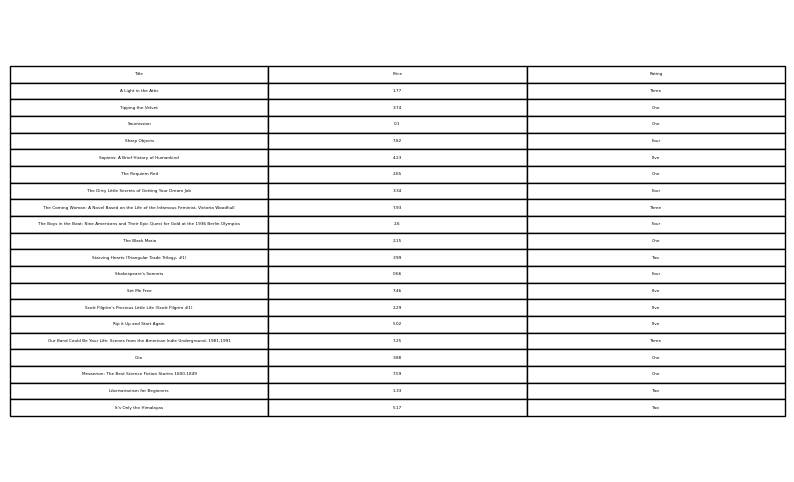

In [36]:
# Export to PDF
plt.figure(figsize=(10, 6))
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.axis('off')
plt.savefig('data.pdf')

In [37]:
df["Price"].describe()

count    20.000000
mean      4.048500
std       2.481392
min       0.100000
25%       2.255000
50%       3.810000
75%       5.690000
max       7.930000
Name: Price, dtype: float64

In [38]:
df['Rating'].value_counts()

Rating
One      6
Four     4
Five     4
Three    3
Two      3
Name: count, dtype: int64

/home/phenx-09/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


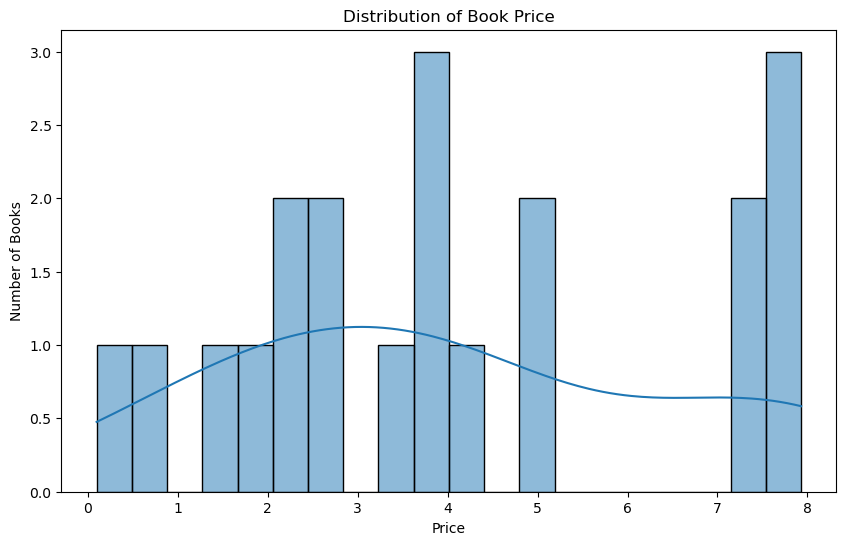

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],kde=True,bins=20)
plt.title("Distribution of Book Price")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.show()

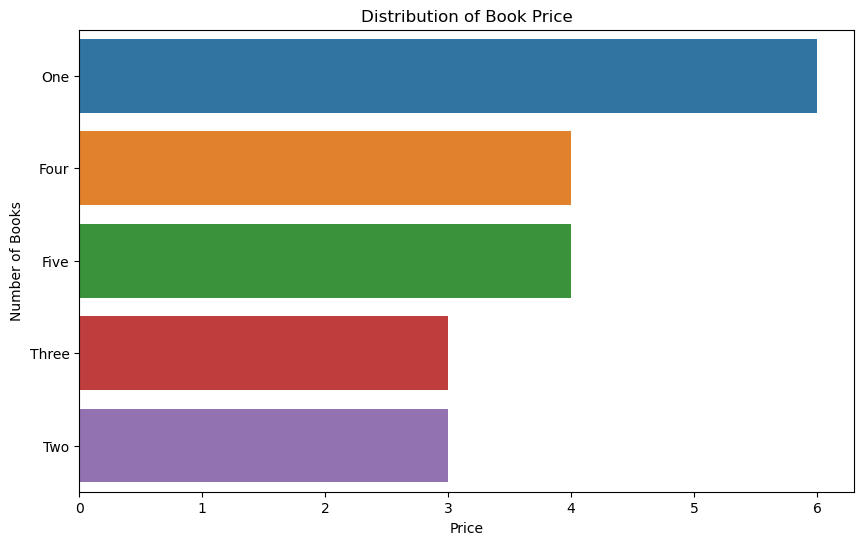

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Rating'],order=df['Rating'].value_counts().index)
plt.title("Distribution of Book Price")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.show()

In [50]:
average_price=df.groupby('Rating')['Price'].mean().sort_values(ascending=False)

In [51]:
average_price

Rating
Three    5.650000
Five     4.750000
Four     3.605000
Two      3.496667
One      3.351667
Name: Price, dtype: float64

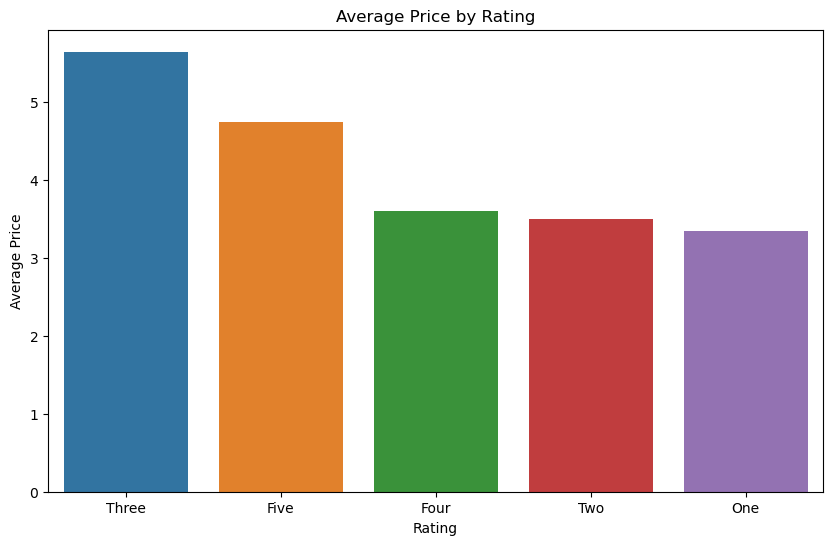

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x=average_price.index,y=average_price.values)
plt.title("Average Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price")
plt.show()

In [ ]:
# Till now we retrive a single page data, 
# now we will fetch all the page data from the website

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

BASE_URL = "https://books.toscrape.com/"

In [3]:
def scrape_books(url):
    books_data = []

    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        books = soup.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')

        for book in books:
            title = book.h3.a.attrs['title']
            # USing regex to extract numeric values from the string
            price_string = book.find('p', class_='price_color').text
            price = float(re.search(r'(\d+\.\d+)',price_string).group(1))
            rating = book.find('p',class_='star-rating')['class'][1]
            books_data.append([title,price,rating])

        # Get next page URL
        next_page = soup.find('li',class_='next')
        if next_page:
            if next_page.a.attrs['href'].startswith('/'):
                url = BASE_URL+r.strip('/') + next_page.a.attrs['href']
            else:
                url = BASE_URL+ "catalogue/" + next_page.a.attrs['href']
        else:
            url = None
    return pd.DataFrame(books_data, columns=['Title', 'Price', 'Rating'])

df_all = scrape_books(BASE_URL)
print(df_all.head())

                                   Title  Price Rating
0                   A Light in the Attic  51.77  Three
1                     Tipping the Velvet  53.74    One
2                             Soumission  50.10    One
3                          Sharp Objects  47.82   Four
4  Sapiens: A Brief History of Humankind  54.23   Five


In [5]:
# 1. Descripive Statistics
print("Descriptive statistics for Book Price:\n", df_all['Price'].describe())

# 2. Rating Distribution
print("\nRating Distribution:\n", df_all['Rating'].value_counts())

Descriptive statistics for Book Price:
 count    20.000000
mean     38.048500
std      15.135231
min      13.990000
25%      22.637500
50%      41.380000
75%      51.865000
max      57.250000
Name: Price, dtype: float64

Rating Distribution:
 Rating
One      6
Four     4
Five     4
Three    3
Two      3
Name: count, dtype: int64


In [6]:
# 3. Most Expensive Books
print("\n Top 5 most expensive books:\n", df_all.nlargest(5, 'Price'))
# 4. Least Expensive Books
print("\n Top 5 least expensive books:\n", df_all.nsmallest(5, 'Price'))

# 5. Average Price of Books per rating
print("\n Average Price of books per rating:\n", df_all.groupby('Rating')['Price'].mean())



 Top 5 most expensive books:
                                                 Title  Price Rating
15  Our Band Could Be Your Life: Scenes from the A...  57.25  Three
4               Sapiens: A Brief History of Humankind  54.23   Five
1                                  Tipping the Velvet  53.74    One
13  Scott Pilgrim's Precious Little Life (Scott Pi...  52.29   Five
9                                     The Black Maria  52.15    One

 Top 5 least expensive books:
                                                 Title  Price Rating
10     Starving Hearts (Triangular Trade Trilogy, #1)  13.99    Two
12                                        Set Me Free  17.46   Five
7   The Coming Woman: A Novel Based on the Life of...  17.93  Three
11                              Shakespeare's Sonnets  20.66   Four
8   The Boys in the Boat: Nine Americans and Their...  22.60   Four

 Average Price of books per rating:
 Rating
Five     39.750000
Four     31.105000
One      40.018333
Three    42.316667


/home/phenx-09/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


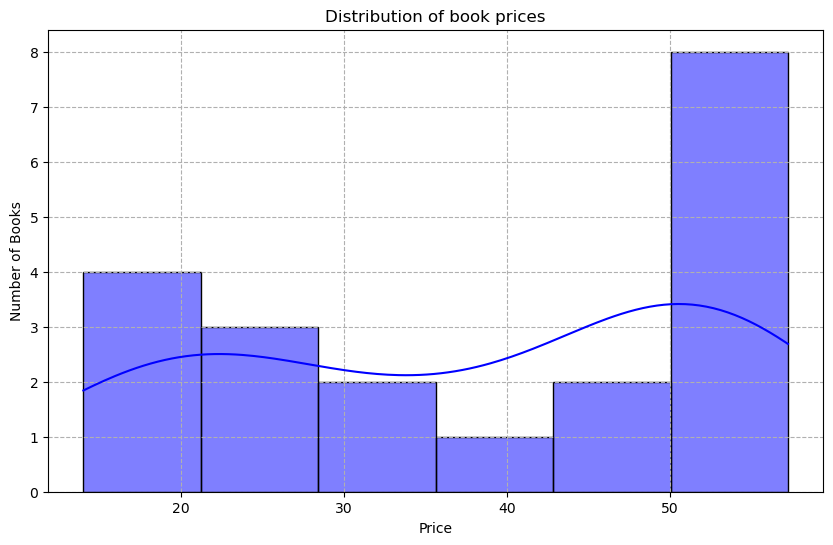

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

#1. Price Distribution Visualization
plt.figure(figsize=(10,6))
sns.histplot(df_all['Price'],kde=True, color="blue")
plt.title("Distribution of book prices")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.grid(True, which="both", ls="--")
plt.show()

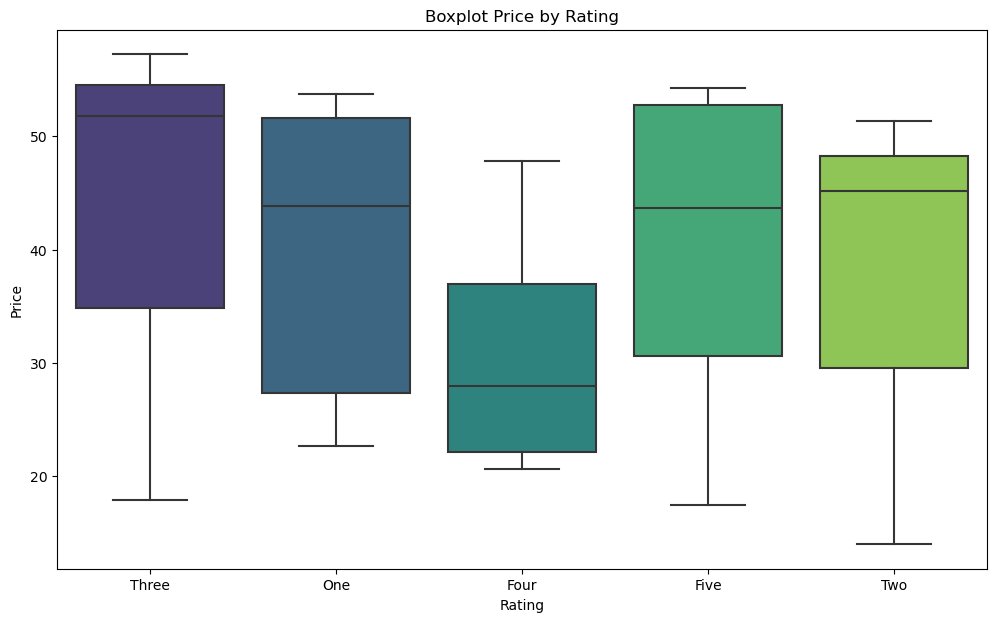

In [11]:
# 2. Boxplot of prices by Rating
plt.figure(figsize=(12,7))
sns.boxplot(x='Rating',y='Price', data=df_all, palette='viridis')
plt.title("Boxplot Price by Rating")
plt.show()

/home/phenx-09/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


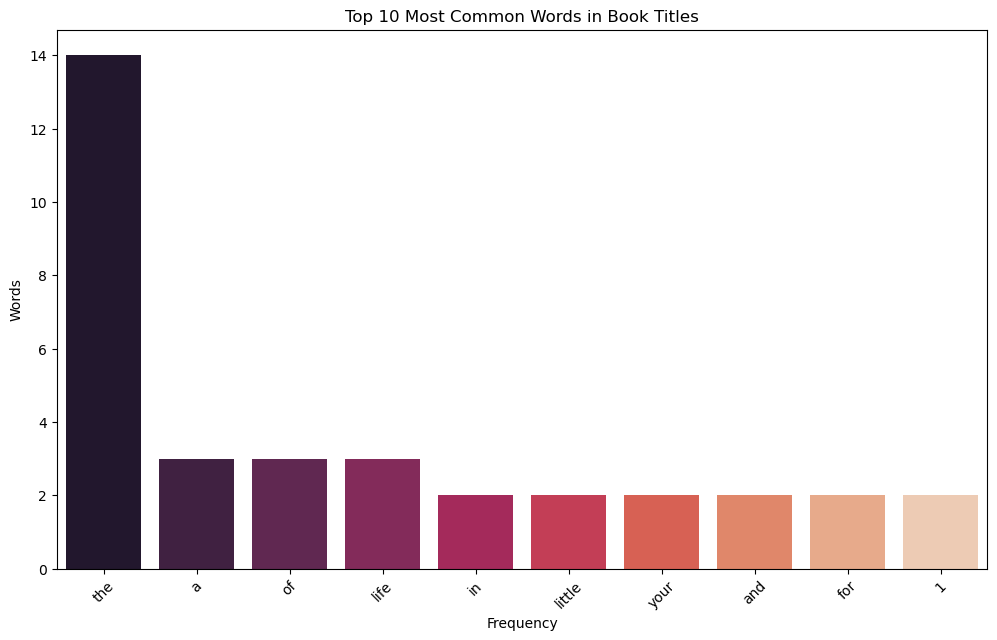

In [17]:
# 3. Top 10 Most common words in Book Titles
import string
all_titles = ' '.join(df_all['Title']).lower()
# Remove punctuation from titles
translator = str.maketrans('', '', string.punctuation)
all_titles_cleaned = all_titles.translate(translator)
words = all_titles_cleaned.split()
word_count = Counter(words)
most_common_words = word_count.most_common(10)

words,counts = zip(*most_common_words)
plt.figure(figsize=(12,7))
sns.barplot(x=list(words),y=list(counts), palette='rocket')
plt.title("Top 10 Most Common Words in Book Titles")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.xticks(rotation=45)
plt.show()

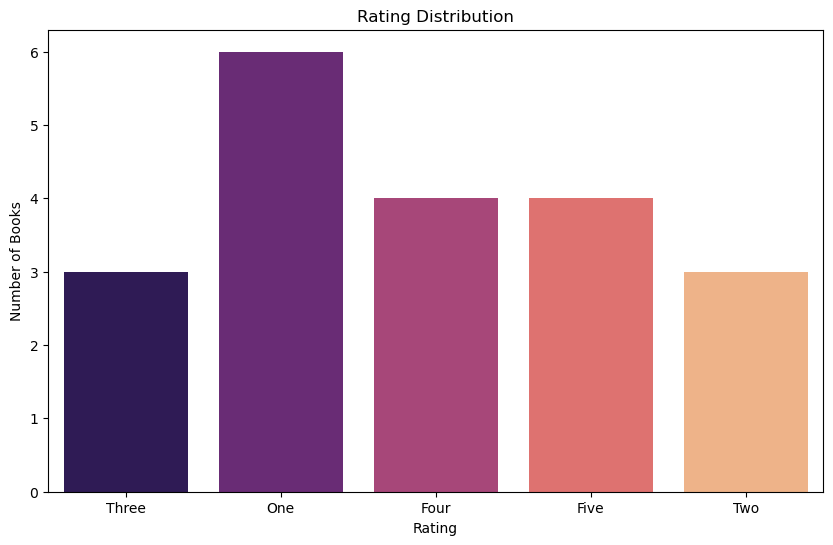

In [19]:
# 4. Rating Distribution Visualization
plt.figure(figsize=(10,6))
sns.countplot(x=df_all['Rating'], palette='magma')
plt.title('Rating Distribution')
plt.ylabel('Number of Books')
plt.show()

Correlation betrween Price and Rating: -0.08


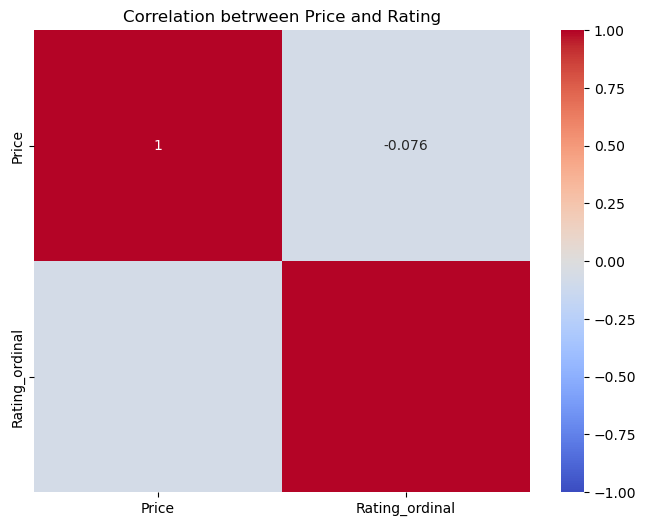

In [20]:
# 5. Correlation Between Price & Rating
# Convert ratings to to ordinal values for correlation computation
rating_order = ["One","Two","Three","Four","Five"]
df_all['Rating_ordinal']=df_all['Rating'].apply(lambda x: rating_order.index(x) + 1)
correlation_matrix = df_all[['Price','Rating_ordinal']].corr()

print(f"Correlation betrween Price and Rating: {correlation_matrix.iloc[0,1]:.2f}")

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation betrween Price and Rating')
plt.show()